# Classification
Same set of data but 3 differents classifiers
* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier

Preprocessing is comon to all models
1. Preprocessing
    1. Import lib
    1. Import dataset
    1. EDA - Exploratory Data Analysis
    1. Separate features from target
    1. Split Train and Test sets (80/20)
    1. Cleaning
        1. Replace missing val (imputers) 
        1. Standardize numerical features + One hot encode categorical variables (transformers)
        1. Encode labels of y

**LogisticRegression**
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set (don't forget imputer & transformers)
1. Evaluate model (confusion matrix, score, precision, recall, score)
1. Features importance

**DecisionTreeClassifier**
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set
1. Evaluate model (confusion matrix, score, precision, recall, score)
1. Features importance

**RandomForestClassifier**
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set
1. Evaluate model (confusion matrix, score, precision, recall, score)
1. Features importance



## Step 1 - Preprocessing

### Step 1.1 - Import libraries

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Step 1.2 - Import dataset

In [12]:
df = pd.read_csv("./99-assets/ML/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Step 1.3 - EDA - Exploratory Data Analysis

In [13]:
print(df.shape)                         # (#rows, #columns)
print(df.describe(include="all"))


# Vérifier que le count est identique pour toutes les colonnes
# Attention on peut avoir le même nb de valeurs qui manquent partout
# Faut correler avec df.shape
# Vérifier les unités
# Les gammes de valeurs des données

# There are tons of options. Here below few examples 

# df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
# df.drop(["Country"], axis=1, inplace = True)

# df.value_counts()
# print(df[df['Embarked'].isna()])                                      # print lines with NaN
# df.isna().sum() / len(df) * 100                                       # print nb of Nana as %
# df.isna().sum() / len(df) * 100 # print nb of Nan as %
# df.isnull().any()                                                     # missing values
# df["Country"].value_counts()/len(df)

# df.hist(bins=50)          # affiche une grande matrice avec tous les graphes y vs x
# df["Country"].hist()

# from pandas.tools.plotting import scatter_matrix
# attributes = ["nom1", "nom2", "nom3"]
# scatter_matrix(housing[attribute], figsize=(10, 10))

# sns.catplot(data = df, x="Sex", y="Survived", kind="bar")
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
              #  s=housing["population"]/75, label="population",
              #  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,10))
# _ = plt.legend()

# corr_matrix = df.corr(numeric_only=True)                         # ne mesure QUE la corrélation linéaire
# corr_matrix

# attributes = ["Age", "Salary"]
# _ = scatter_matrix(df[attributes])

# Créer des combinaisons de variables
# df["debile"] = df["Salayy"]/df["Age"]
# corr_matrix = df.corr(numeric_only=True) # ne mesure QUE la corrélation linéaire
# corr_matrix
# df.drop("debile", axis=1)
  

(400, 5)
             User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000


### Step 1.4 - Separate Target from feature variables

In [14]:
features_list = ['Gender', 'Age', 'EstimatedSalary']           # On ne garde pas "User Id"
X = df.loc[:,features_list]                                    
y = df.loc[:,"Purchased"]                                      
# print(X.head())
# print(y.head())                     

### Step 1.5 - Train / Test split 

In [15]:
# si stratify = y       # Allows you to stratify your sample. 
                        # Meaning, you will have the same proportion of categories in test and train set
# test_size=0.2 is completely arbitrary.  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify = y) 

### Step 1.6 - Cleaning 
1. Remplace missing values - SimpleImputer avec strategy='mean' pour valeurs numériques ou strategy='mode' si il manque des données catégorielles
1. Standardize numerical features + One hot encode categorical variables
1. If y is discrete => Encode labels of y

In [16]:
# A garder sous le coude
# df['column name'] = df['column name'].replace(['old value'], 'new value')

# In this case, no need to Replace missing values
# imputer = SimpleImputer(strategy="mean")
# X_train.iloc[:,[1,2]] = imputer.fit_transform(X_train.iloc[:,[1,2]])

# categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")



# Standardize numerical features + One hot encode categorical variables
print(X_train.head())
print()

numeric_features = [1, 2] 
numeric_transformer = StandardScaler()

categorical_features = [0] 
categorical_transformer = OneHotEncoder(drop="first")               # ! Il faut garder le drop first car ici on a 1 colonne avec 2 categories (M/F)
                                                                    # Sinon on a 2 colonnes qui sont 100% corrélées et c'est mauvais le modèle
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )
X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:])                                               # print first 5 rows (not using iloc since now X_train became a numpy array)



# In this case, no need to Encode labels of y
  # labelencoder = LabelEncoder()    
  # y_train = labelencoder.fit_transform(y_train)

     Gender  Age  EstimatedSalary
213    Male   35            58000
192    Male   29            43000
26     Male   49            28000
195    Male   34            43000
252  Female   48           134000

[[ 1.         -0.25808475 -0.33624928]
 [ 1.         -0.82439644 -0.77364672]
 [ 1.          1.06330919 -1.21104417]
 [ 1.         -0.35247004 -0.77364672]
 [ 0.          0.9689239   1.87989775]]


## Step 2 - Build the model - LogisticRegression

### 2.1 Select and train a model

In [17]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)                  # This steps is the actual training

LogisticRegression(random_state=0)

### 2.2 Apply model on train set

In [18]:
y_train_pred = classifier.predict(X_train)
# print(y_train_pred[0:5])                      # print first 5 rows
                                                # ! y_train became a numpy array

### 2.3 Apply model on test set

In [19]:
# Process test set data

# 1.5 - No missing values => No imputer.transform...

# 1.5 - Encoding categorical features and standardizing numeric features
X_test = feature_encoder.transform(X_test)

# 1.5 - No need to encode y labels => No LabelEncoder

In [20]:
# Predictions on test set
# cf 2.1 above
y_test_pred = classifier.predict(X_test) 
#print(y_train_pred[0:5])

## Step 3 - Evaluate the model

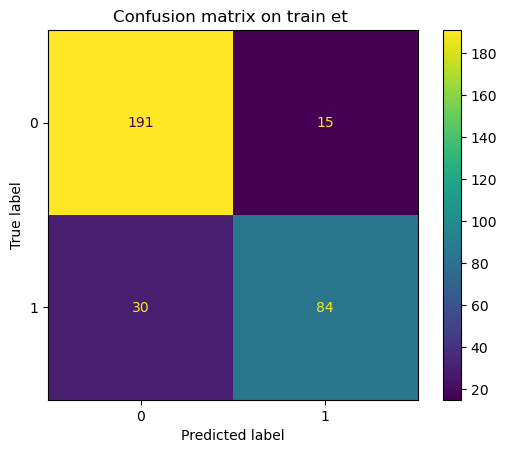

In [21]:
# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train et ") 
plt.show() 



In [22]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_train, y_train_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_train, y_train_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy on train set                            : {classifier.score(X_train, y_train):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.848
Recall TP/(TP+FN)  - Bottom line                 : 0.737
F1 2/(1/Prec + 1/Rec)                            : 0.789
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.859
Accuracy on train set                            : 0.859


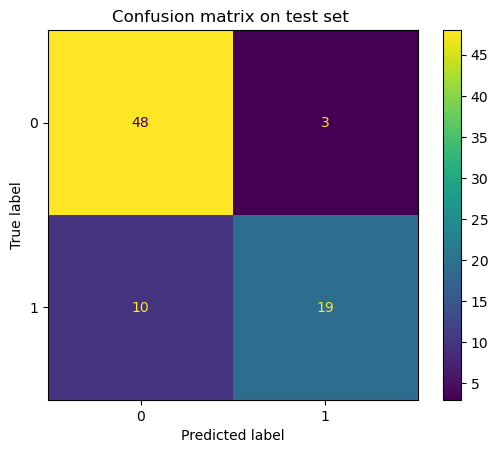

In [23]:
# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 

In [24]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Credit card
# Recall    : Out of the total positive, what percentage are predicted positive.    Spam
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_test, y_test_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_test, y_test_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy on test set                             : {classifier.score(X_test, y_test):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.864
Recall TP/(TP+FN)  - Bottom line                 : 0.655
F1 2/(1/Prec + 1/Rec)                            : 0.745
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.838
Accuracy on test set                             : 0.838


## Step 4 - Features importance
If you want to interpret coefficients, make sure you `NORMALIZED` your data in the preprocessing part

In [25]:

feature_importance = pd.DataFrame({
    "feature_names": X.columns,
    "coefficients" : classifier.coef_.squeeze() # ! Bien comprendre ce qui se passe ici
                                                # CAREFUL HERE. We need to access first index of our list because 
                                                # Data needs to be 1 dimensional
                                                # That's what .squeeze() is for
})

feature_importance.sort_values(by="coefficients", ascending=False, inplace=True)
print(feature_importance)
print("Constant is                    : ", classifier.intercept_)

     feature_names  coefficients
1              Age      2.221089
2  EstimatedSalary      1.086204
0           Gender      0.359329
Constant is                    :  [-1.27921518]


$$ 
y = \frac{1}{1+e^{0.35 \times Gender + 2.2 \times Age + 1.08 \times EstimatedSalary - 1.10}}
$$

In [26]:
# En chantier : Voir que par rapport à l'équation précédente, ici on écrit la formule avec les variables
# Comme ça si ça les valeurs changent on à rien à faire.

# TODO : à terminer et à rendre encore plus générique 

from IPython.display import Latex
feature0 = feature_importance.loc[0, "feature_names"]
coef0 = feature_importance.loc[0, "coefficients"].round(2)

feature1 = feature_importance.loc[1, "feature_names"]
coef1 = feature_importance.loc[1, "coefficients"].round(2)

feature2 = feature_importance.loc[2, "feature_names"]
coef2 = feature_importance.loc[2, "coefficients"].round(2)

constant = classifier.intercept_[0].round(2)

Latex(f"""\\begin{{equation*}}
y = \\frac{1}{{1 + e^{{   {coef0}*{feature0}  + {coef1}*{feature1}  + {coef2}*{feature2}  + {constant}   }}                      }}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

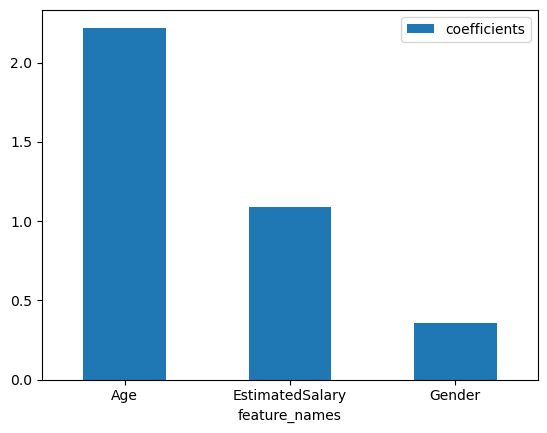

In [27]:
_ = feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names") # , figsize=(16*.65, 9*.65)
_ = plt.xticks(rotation=0)


## Step 2 - Build the model - DecisionTreeClassifier

### 2.1 Select and train a model

In [28]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### 2.2 Apply model on train set

In [29]:
y_train_pred = classifier.predict(X_train)

### 2.3 Apply model on test set

In [30]:
y_test_pred = classifier.predict(X_test)

## Step 3 - Evaluate the model

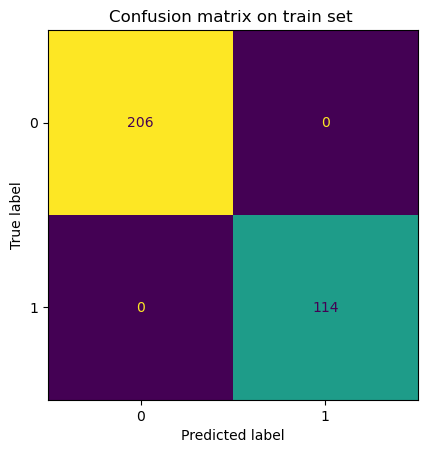

In [31]:
# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on train set ")

plt.show()


In [32]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_train, y_train_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_train, y_train_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy       on train set                      : {classifier.score(X_train, y_train):.3f}")

Precision TP/(TP+FP) - Left col                  : 1.000
Recall TP/(TP+FN)  - Bottom line                 : 1.000
F1 2/(1/Prec + 1/Rec)                            : 1.000
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 1.000
Accuracy       on train set                      : 1.000


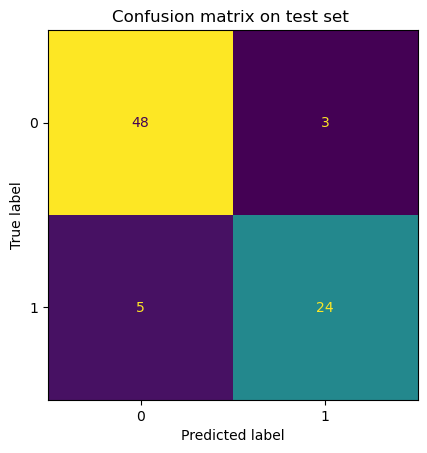

In [33]:
# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show()

In [34]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_test, y_test_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_test, y_test_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy on train set                            : {classifier.score(X_test, y_test):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.889
Recall TP/(TP+FN)  - Bottom line                 : 0.828
F1 2/(1/Prec + 1/Rec)                            : 0.857
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.900
Accuracy on train set                            : 0.900


## Step 4 - Feature importance

In [35]:
# Feature importance 
# Feature importance is here determined using Gini coefficient. 
# It's a little too complex at this point but feel free to check out documentation
# https://scikit-learn.org/stable/modules/tree.html#classification-criteria

feature_importance = pd.DataFrame({
    "feature_names": X.columns,
    "coefficients": classifier.feature_importances_
})
feature_importance

,feature_names,coefficients
0,Gender,0.043150
1,Age,0.519309
2,EstimatedSalary,0.437541


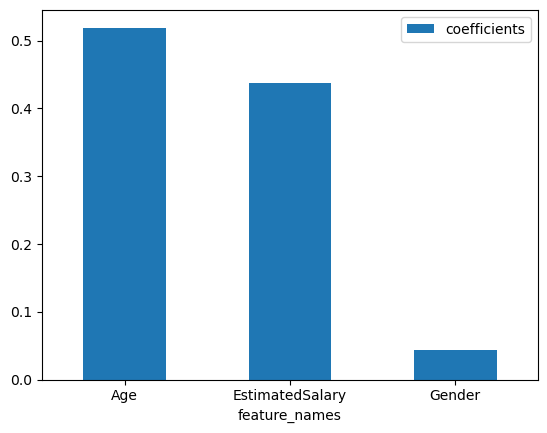

In [36]:
_ = feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names")
_ = plt.xticks(rotation=0)


## Step 2 - Build the model - RandomForestClassifier

### 2.1 Select and train a model

In [37]:
# This is an advanced model, you'll need to tune `_estimators
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

### 2.2 Apply model on train set

In [38]:
y_train_pred = classifier.predict(X_train)

### 2.3 Apply model on test set

In [39]:
y_test_pred = classifier.predict(X_test)

## Step 3 - Evaluate the model

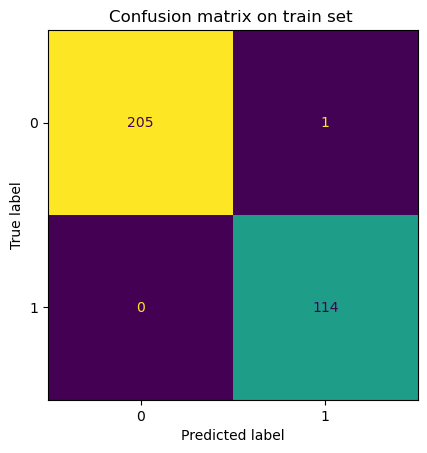

In [40]:
# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on train set ") 
plt.show() 

In [41]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_train, y_train_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_train, y_train_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy on train set                            : {classifier.score(X_train, y_train):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.991
Recall TP/(TP+FN)  - Bottom line                 : 1.000
F1 2/(1/Prec + 1/Rec)                            : 0.996
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.997
Accuracy on train set                            : 0.997


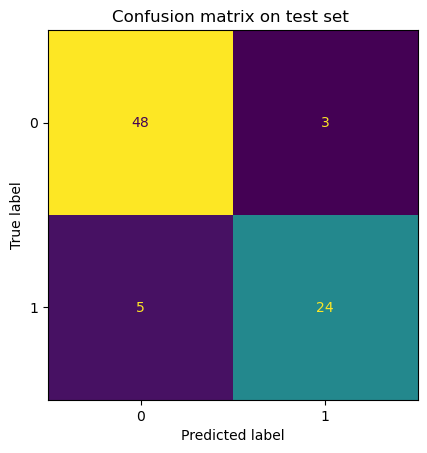

In [42]:
# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 

In [43]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_test, y_test_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_test, y_test_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy on test set                             : {classifier.score(X_test, y_test):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.889
Recall TP/(TP+FN)  - Bottom line                 : 0.828
F1 2/(1/Prec + 1/Rec)                            : 0.857
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.900
Accuracy on test set                             : 0.900


## Step 4 - Feature importance

In [44]:
# Feature importance 
# Feature importance is here determined using Gini coefficient. 
# It's a little too complex at this point but feel free to check out documentation
# https://scikit-learn.org/stable/modules/tree.html#classification-criteria

feature_importance = pd.DataFrame({
    "feature_names": X.columns,
    "coefficients": classifier.feature_importances_
                                        
})
feature_importance

,feature_names,coefficients
0,Gender,0.010495
1,Age,0.551074
2,EstimatedSalary,0.438431


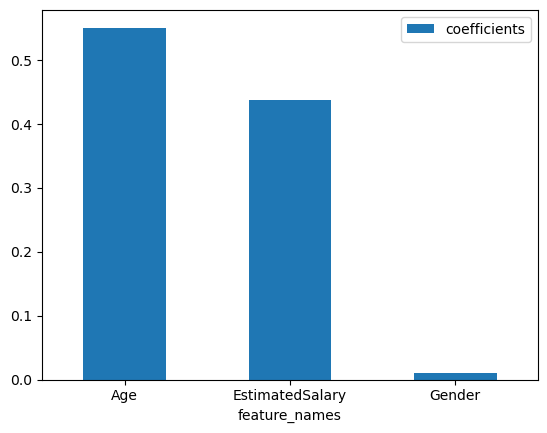

In [45]:
_ = feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names")
_ = plt.xticks(rotation=0)
